In [63]:
import adddeps
from utils.logs import get_stdout_logger
from simulator.magnetic import SimulatorMagnetic
from matplotlib import pyplot as plt
import numpy as np
import numbers

params_model = {
    "group_name" : "BEnsemble 2",
    "abc":np.array([10**0.5]*3),
    "sigma":1.5,
    "epsilon":1.0,
    "get_logger" : get_stdout_logger
}
params_init = {
    "energy": 1.0,
    "sigma_grid":1.65,
    "position_random_shift_percentage": 0.0/100,
    "angular_momentum_factor":0.6,
    "planar": False,
    "zero_momentum": False,
}
params_simulation = {
    "iteration_time" : 100,
    "dt" : 1e-3,
    "record_interval" : 1e-1,
    "algorithm" : "VERLET",
    # "before_step" : before_step
}

sim = SimulatorMagnetic(Bz=1e-3, **params_model)
sim.init_positions_closepack(**params_init)
sim.init_velocities(**params_init)

sim.particle_number()

135

In [64]:
sim.simulate_estimate(**params_simulation)

{'time': datetime.timedelta(seconds=220, microseconds=500000),
 'memory': 9.012222290039062}

In [65]:
sim.simulate(**params_simulation);

2023-02-21 18:58:36,930 - base - INFO - starting simulation None BEnsemble 2 [Process: 25512, base.py:simulate(427)]


100%|██████████| 100000/100000 [01:20<00:00, 1237.06it/s]


In [66]:
dfs = sim.get_data_frames()

In [67]:
dfs.keys()

dict_keys(['index', 'KE', 'PE', 'L', 'IE', 'collisions', 'BInertia'])

2023-02-21 19:00:34,374 - legend - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument. [Process: 25512, legend.py:_parse_legend_args(1218)]


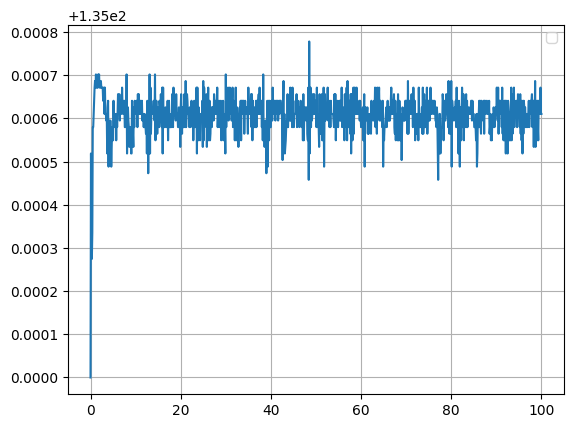

In [69]:
plt.plot((dfs["KE"] + dfs["PE"] + 0.5* dfs["IE"]).sum(axis=1))
plt.grid()
plt.legend()

2023-02-21 19:00:34,791 - legend - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument. [Process: 25512, legend.py:_parse_legend_args(1218)]


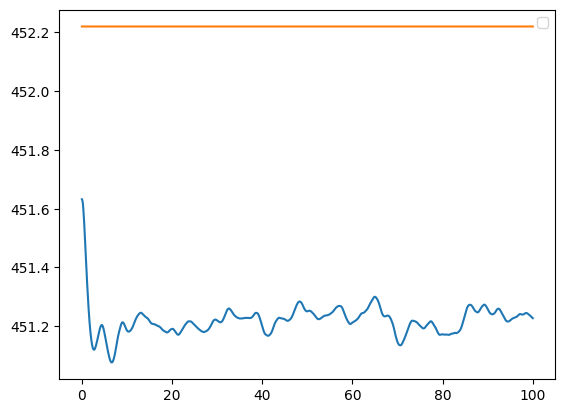

In [70]:
plt.plot(( dfs["L"]).sum(axis=1))
plt.plot((dfs["BInertia"] + dfs["L"]).sum(axis=1))
plt.legend()

In [71]:
sim.get_history().keys()

dict_keys(['time', 'rs', 'vs', 'KE', 'PE', 'IE', 'L', 'OMEGA', 'collisions', 'BInertia'])

In [74]:
(sim.get_history()["vs"]**2)[800:].mean(axis=0).mean(axis=1)

array([0.67339295, 0.666182  , 0.29308024], dtype=float32)

In [75]:
(sim.get_history()["vs"]**2).shape

(1001, 3, 135)

In [39]:
dfs["KE"]

,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,134
0.0,0.191523,1.657899,1.043054,4.744016,1.745346,0.362802,0.961795,1.012746,0.551847,0.939419,...,0.362598,2.985890,3.932548,2.133459,3.571108,0.902815,2.768657,2.880105,2.508154,2.253410
0.1,0.194670,1.663092,0.834363,3.194004,1.457483,0.382333,0.957279,0.916028,0.466004,0.832694,...,0.294340,2.984527,3.617144,2.147318,3.407536,0.863164,2.775100,2.772999,2.304242,2.208109
0.2,0.408792,2.282520,0.338559,1.993802,1.425070,0.207769,1.116832,0.717885,0.176485,0.845135,...,0.636618,3.090641,3.740527,2.367946,3.469935,0.847507,2.596288,2.402790,1.942843,2.136015
0.3,0.383364,2.363127,0.128163,2.534708,1.586075,0.805958,1.293410,0.305613,0.014500,1.028853,...,0.774008,2.857694,4.190753,2.558074,3.630861,1.036681,2.677381,1.961608,1.605752,2.077875
0.4,0.372758,2.162395,0.192970,2.506527,1.768764,1.118623,1.251061,0.177797,0.498113,0.978138,...,0.980141,1.091898,4.193258,2.640438,3.922209,1.058547,3.297600,1.472957,1.545220,2.100992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.6,1.992198,1.802660,1.491341,0.400592,1.118266,0.824283,1.240365,2.272437,1.494584,1.828735,...,0.462509,1.573098,0.484034,2.228854,2.327714,0.642930,3.502515,2.064618,0.817393,0.355694
9.7,2.067095,2.002251,0.877679,0.091462,1.224610,0.977564,1.175887,2.070371,0.745044,2.024463,...,0.400601,1.730865,0.557198,2.371392,1.344177,0.724958,3.482877,2.220671,0.532244,0.363616
9.8,2.054189,2.354825,0.348550,0.055790,1.372124,0.918781,1.257297,2.419863,0.542202,1.963012,...,1.178077,2.016782,0.735021,2.639030,0.807626,0.625722,1.570964,2.406468,0.323235,0.349622
9.9,1.843206,2.607247,0.231971,0.312622,1.372883,0.711215,1.605555,2.545779,0.604729,1.849170,...,1.400440,2.275495,0.851367,1.993692,1.108747,2.601808,1.467513,2.227473,0.268589,0.542401
